<a href="https://colab.research.google.com/github/JulianaCarvajal/Proyecto_Deep_Learning/blob/main/02_Analisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Cargar el archivo CSV desde GitHub
file_path = "https://raw.githubusercontent.com/JoseUrrego123/ProyectoDeepLearning/main/combined_wind_data.csv"

# Descargar el archivo desde GitHub
response = requests.get(file_path)
if response.status_code == 200:
    # Leer el contenido del archivo en un DataFrame
    data = pd.read_csv(StringIO(response.text))
data = pd.read_csv(file_path)

In [ ]:
# Información general del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3652 non-null   object 
 1   WS10M_MAX_punto1  3652 non-null   float64
 2   WS10M_MAX_punto2  3652 non-null   float64
 3   WS10M_MAX_punto3  3652 non-null   float64
 4   WS10M_MAX_punto4  3652 non-null   float64
 5   WS10M_MAX_punto5  3652 non-null   float64
 6   WS10M_MAX_punto6  3652 non-null   float64
dtypes: float64(6), object(1)
memory usage: 199.8+ KB


In [ ]:
data.describe()

,WS10M_MAX_punto1,WS10M_MAX_punto2,WS10M_MAX_punto3,WS10M_MAX_punto4,WS10M_MAX_punto5,WS10M_MAX_punto6
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,2.082007,1.298675,1.249228,1.937218,2.786375,1.682968
std,0.512334,0.245305,0.224775,0.494115,0.698442,0.427700
min,0.830000,0.620000,0.590000,0.700000,0.910000,0.660000
25%,1.710000,1.120000,1.090000,1.590000,2.290000,1.370000
50%,2.040000,1.280000,1.230000,1.920000,2.770000,1.630000
75%,2.412500,1.450000,1.390000,2.260000,3.220000,1.960000
max,4.160000,2.200000,2.150000,4.090000,6.300000,3.420000


In [ ]:
# Revisar datos faltantes
print(data.isnull().sum())

Date                0
WS10M_MAX_punto1    0
WS10M_MAX_punto2    0
WS10M_MAX_punto3    0
WS10M_MAX_punto4    0
WS10M_MAX_punto5    0
WS10M_MAX_punto6    0
dtype: int64


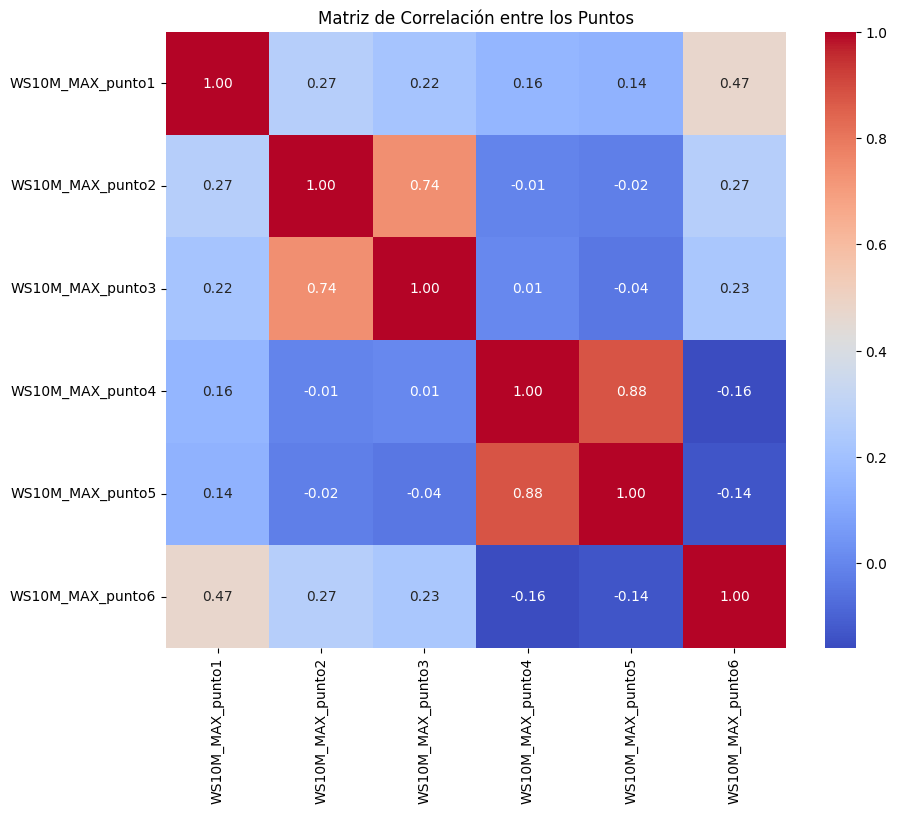

In [ ]:
# Análisis Correlacional entre Puntos
# Excluir columnas no numéricas antes de calcular la matriz de correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Selecciona solo columnas numéricas
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación entre los Puntos")
plt.show()

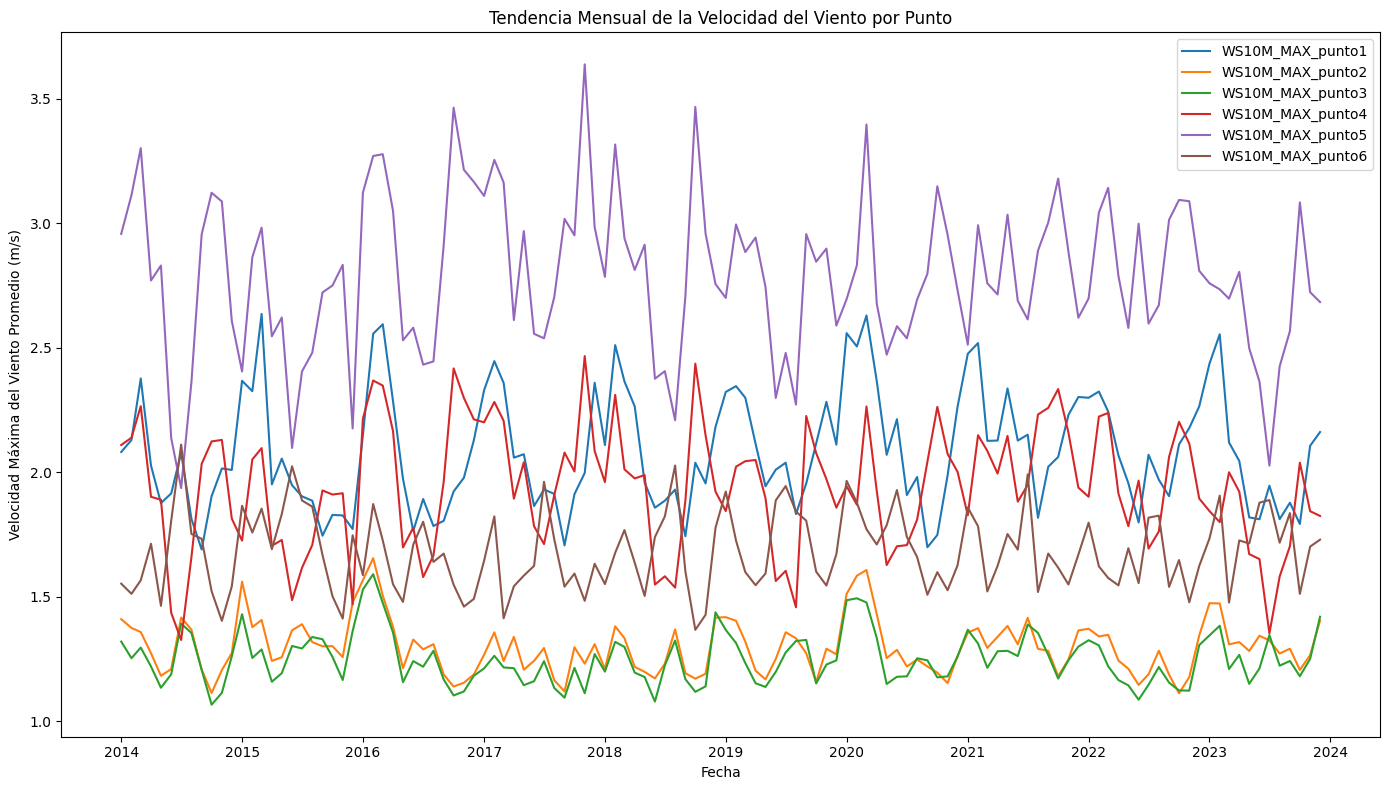

In [ ]:
# Visualización de la Tendencia Temporal por Punto
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Agrupar los datos por mes y calcular el promedio mensual
data['YearMonth'] = data['Date'].dt.to_period('M')  # Extraer año y mes
monthly_data = data.groupby('YearMonth').mean().reset_index()

# Convertir el índice YearMonth a datetime para graficar
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

# Graficar tendencias mensuales por punto
plt.figure(figsize=(14, 8))
columns = [col for col in data.columns if 'WS10M_MAX' in col]

for column in columns:
    plt.plot(monthly_data['YearMonth'], monthly_data[column], label=column)

plt.xlabel("Fecha")
plt.ylabel("Velocidad Máxima del Viento Promedio (m/s)")
plt.title("Tendencia Mensual de la Velocidad del Viento por Punto")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# Tendencia mensual interactiva punto 6
fig = px.line(
    monthly_data,
    x='YearMonth',
    y='WS10M_MAX_punto6',
    title="Promedio Mensual de la Velocidad del Viento para el Punto 6"
)
fig.update_layout(xaxis_title="Fecha", yaxis_title="Velocidad Promedio (m/s)")
fig.show()

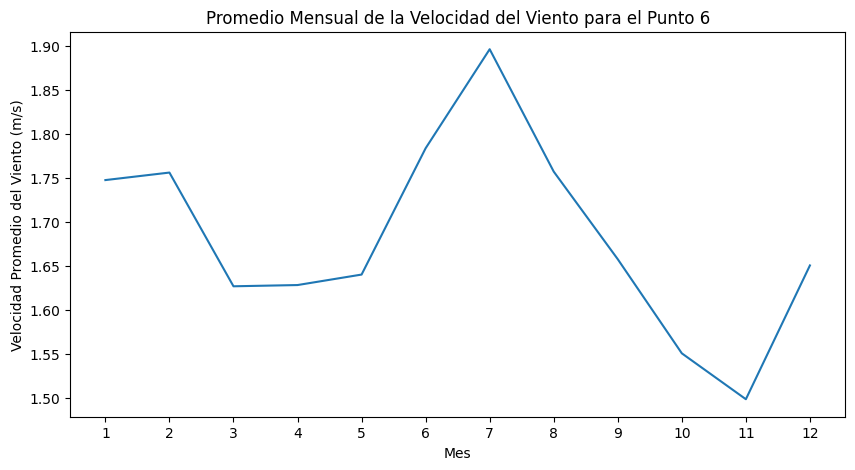

In [ ]:
# Promedio Mensual para el Punto 6
# Extraer mes para análisis estacional
data['Month'] = data['Date'].dt.month

monthly_avg = data.groupby('Month')['WS10M_MAX_punto6'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xlabel("Mes")
plt.ylabel("Velocidad Promedio del Viento (m/s)")
plt.title("Promedio Mensual de la Velocidad del Viento para el Punto 6")
plt.xticks(range(1, 13))
plt.show()

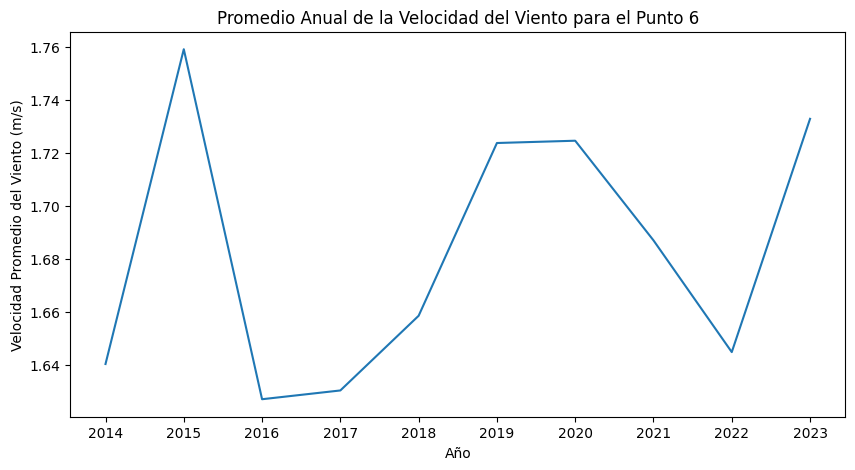

In [ ]:
# Promedio Anual para el Punto 6
# Extraer año para análisis estacional
data['Year'] = data['Date'].dt.year

yearly_avg = data.groupby('Year')['WS10M_MAX_punto6'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values)
plt.xlabel("Año")
plt.ylabel("Velocidad Promedio del Viento (m/s)")
plt.title("Promedio Anual de la Velocidad del Viento para el Punto 6")
plt.xticks(range(data['Year'].min(), data['Year'].max() + 1))
plt.show()

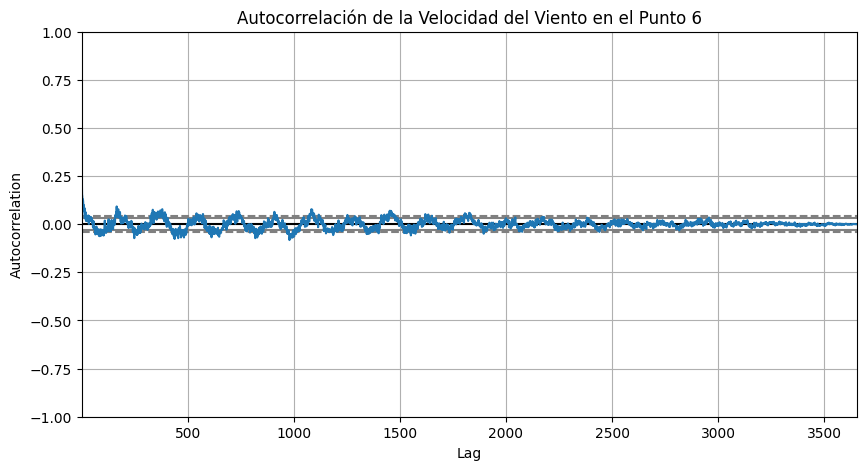

In [ ]:
# Análisis de Autocorrelación para el Punto 6
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(data['WS10M_MAX_punto6'].dropna())
plt.title("Autocorrelación de la Velocidad del Viento en el Punto 6")
plt.show()

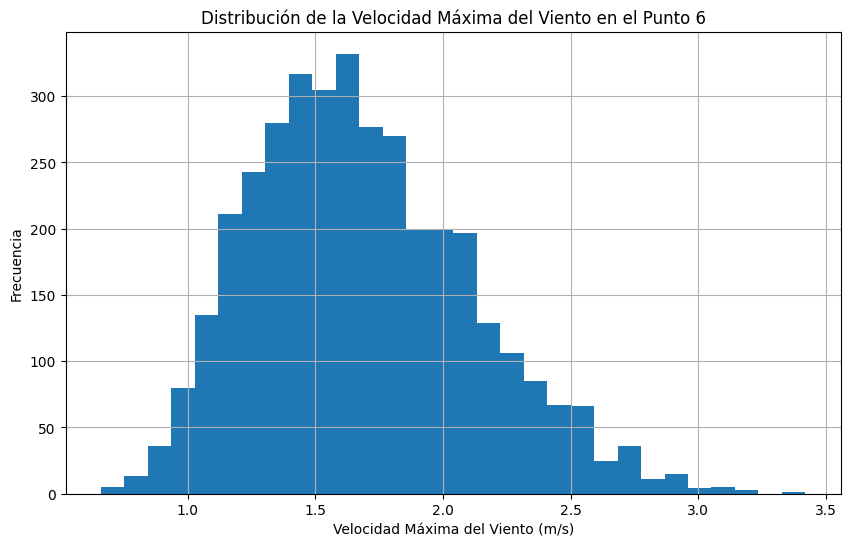

In [ ]:
# Distribución de la Velocidad Máxima del Viento en el Punto 6
plt.figure(figsize=(10, 6))
data["WS10M_MAX_punto6"].hist(bins=30)
plt.xlabel("Velocidad Máxima del Viento (m/s)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Velocidad Máxima del Viento en el Punto 6")
plt.show()

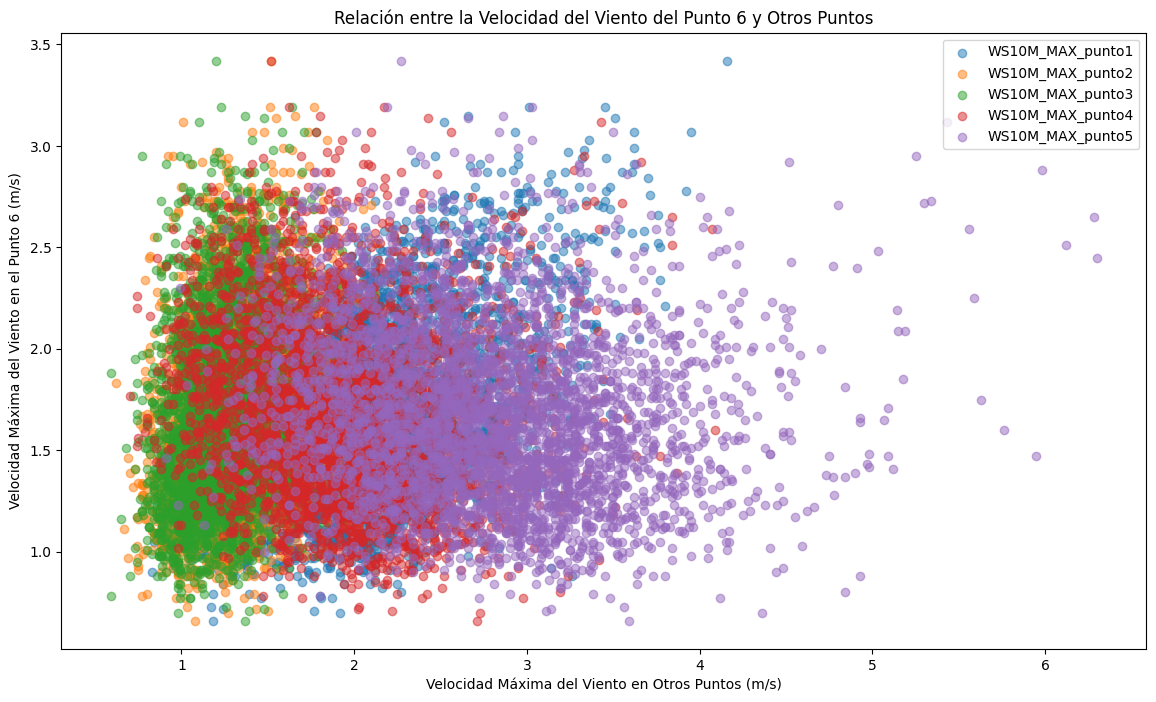

In [ ]:
# Relación entre el Punto 6 y otros Puntos
plt.figure(figsize=(14, 8))
for column in columns:
    if column != 'WS10M_MAX_punto6':
        plt.scatter(data[column], data['WS10M_MAX_punto6'], alpha=0.5, label=column)

plt.xlabel("Velocidad Máxima del Viento en Otros Puntos (m/s)")
plt.ylabel("Velocidad Máxima del Viento en el Punto 6 (m/s)")
plt.title("Relación entre la Velocidad del Viento del Punto 6 y Otros Puntos")
plt.legend(loc='upper right')
plt.show()